# Extended Data Figure 8: Somatosensory cortex decoding from primate recording

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import joblib as jl
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib import cm, colors


In [2]:
data = pd.read_hdf('../data/EDFigure8.h5')

## Figure S9a

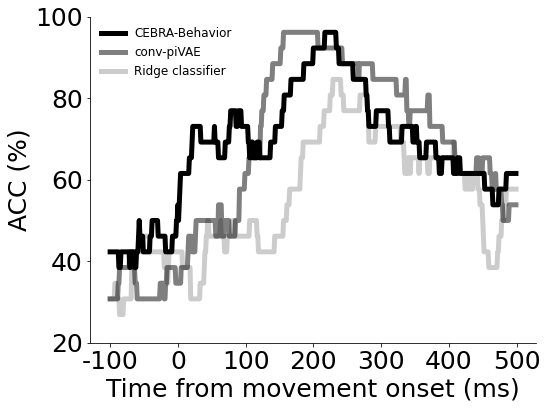

In [3]:
results = data["direction_decoding"]
cebra_acc_time = results["cebra"]
pivae_acc_time = results["pivae"]
ridge_acc_time = results["ridge"]

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(cebra_acc_time, label="CEBRA-Behavior", color="k", lw=5)
ax.plot(pivae_acc_time, label="conv-piVAE", color="black", alpha=0.5, lw=5)
ax.plot(ridge_acc_time, label="Ridge classifier", color="k", alpha=0.2, lw=5)
# ax.plot(vel/vel.max()*100, label = 'hand speed')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend(frameon=False, fontsize=12)
plt.ylabel("ACC (%)", fontsize=25)
plt.yticks(np.linspace(20, 100, 5), fontsize=25)
plt.xlabel("Time from movement onset (ms)", fontsize=25)
plt.xticks(
    np.linspace(0, 600, 7, dtype=int), np.linspace(-100, 500, 7, dtype=int), fontsize=25
)
plt.show()

## Figure S9b

([<matplotlib.axis.XTick at 0x7fb5c0d3f370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

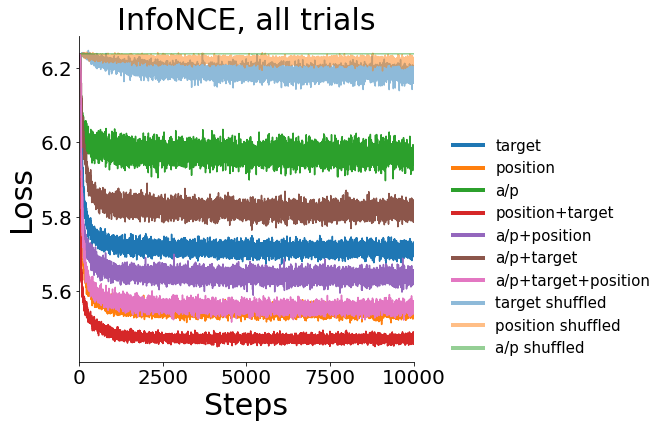

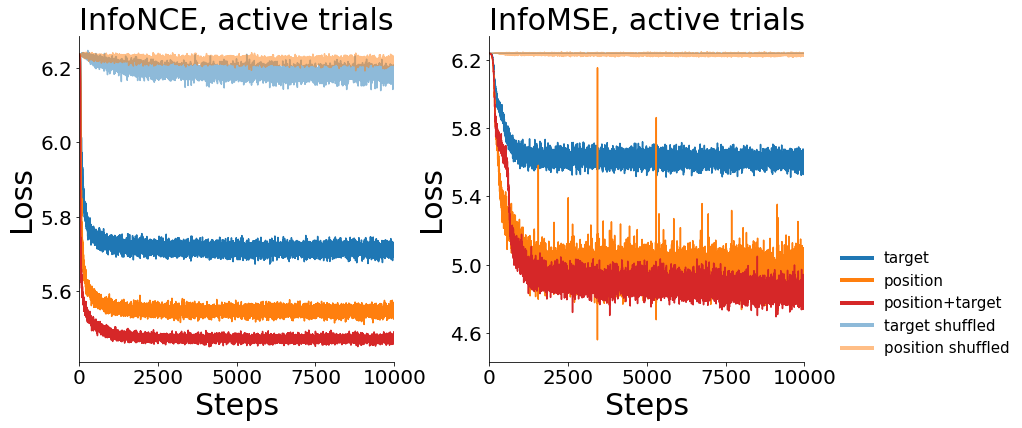

In [4]:


fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.set_title("InfoNCE, all trials", fontsize=30)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

all_loss_data = data["all_trial_loss"]
all_ap = all_loss_data["ap"]
all_pos = all_loss_data["pos"]
all_target = all_loss_data["target"]
all_postarget = all_loss_data["pos_target"]
all_appos = all_loss_data["ap_pos"]
all_aptarget = all_loss_data["ap_target"]
all_appostarget = all_loss_data["ap_pos_target"]

all_ap_sh = all_loss_data["ap_shuffle"]
all_pos_sh = all_loss_data["pos_shuffle"]
all_target_sh = all_loss_data["target_shuffle"]

w = 9
p = 7


ax1.plot(scipy.signal.savgol_filter(all_target, w, p), label="target")
ax1.plot(
    scipy.signal.savgol_filter(all_pos, w, p),
    label="position",
)
ax1.plot(scipy.signal.savgol_filter(all_ap, w, p), label="a/p")

ax1.plot(
    scipy.signal.savgol_filter(all_target_sh, w, p),
    label="target shuffled",
    c=plt.cm.tab10(0),
    alpha=0.5,
)
ax1.plot(
    scipy.signal.savgol_filter(all_pos_sh, w, p),
    label="position shuffled",
    c=plt.cm.tab10(1),
    alpha=0.5,
)
ax1.plot(
    scipy.signal.savgol_filter(all_ap_sh, w, p),
    label="a/p shuffled",
    c=plt.cm.tab10(2),
    alpha=0.5,
)

ax1.plot(scipy.signal.savgol_filter(all_postarget, w, p), label="pos+target")
ax1.plot(scipy.signal.savgol_filter(all_appos, w, p), label="ap+pos")
ax1.plot(scipy.signal.savgol_filter(all_aptarget, w, p), label="ap+target")
ax1.plot(scipy.signal.savgol_filter(all_appostarget, w, p), label="ap+pos+target")

plt.xlim([0, 10000])
plt.xlabel("Steps", fontsize=30)
plt.xticks(np.linspace(0, 10000, 5), fontsize=20)
plt.yticks(np.linspace(6.2, 5.6, 4), fontsize=20)
plt.ylabel("Loss", fontsize=30)


custom_lines = [
    Line2D([0], [0], lw=4, c=plt.cm.tab10(0)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(1)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(2)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(3)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(4)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(5)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(6)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(0), alpha=0.5),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(1), alpha=0.5),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(2), alpha=0.5),
]
ax1.legend(
    custom_lines,
    [
        "target",
        "position",
        "a/p",
        "position+target",
        "a/p+position",
        "a/p+target",
        "a/p+target+position",
        "target shuffled",
        "position shuffled",
        "a/p shuffled",
    ],
    loc=(1.1, 0),
    frameon=False,
    fontsize=15,
)



fig = plt.figure(figsize=(13, 6))
plt.subplots_adjust(wspace=0.3)

ax2 = fig.add_subplot(121)
ax2.set_title("InfoNCE, active trials", fontsize=30)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

w = 9
p = 7


active_nce_data = data["active_trial_loss"]
active_pos = active_nce_data["pos"]
active_target = active_nce_data["target"]
active_postarget = active_nce_data["pos_target"]

active_pos_sh = active_nce_data["pos_shuffle"]
active_target_sh = active_nce_data["target_shuffle"]

c_id = np.linspace(50, 250, 7, dtype=int)

ax2.plot(
    scipy.signal.savgol_filter(active_target, w, p), label="target", c=plt.cm.tab10(0)
)

ax2.plot(
    scipy.signal.savgol_filter(active_target_sh, w, p),
    label="target-shuffled",
    c=plt.cm.tab10(0),
    alpha=0.5,
)

ax2.plot(
    scipy.signal.savgol_filter(active_pos, w, p), label="position", c=plt.cm.tab10(1)
)
ax2.plot(
    scipy.signal.savgol_filter(active_pos_sh, w, p),
    label="position-shuffled",
    c=plt.cm.tab10(1),
    alpha=0.5,
)
ax2.plot(
    scipy.signal.savgol_filter(active_postarget, w, p),
    label="position+target",
    c=plt.cm.tab10(3),
)

plt.xlim([0, 10000])
plt.xlabel("Steps", fontsize=30)
plt.xticks(np.linspace(0, 10000, 5), fontsize=20)
plt.yticks(np.linspace(6.2, 5.6, 4), fontsize=20)
plt.ylabel("Loss", fontsize=30)


ax3 = fig.add_subplot(122)
ax3.set_title("InfoMSE, active trials", fontsize=30)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

active_mse_data = data['active_mse_loss']
active_pos = active_mse_data["pos"]
active_target = active_mse_data["target"]
active_postarget = active_mse_data["pos_target"]

active_pos_sh = active_mse_data["pos_shuffled"]
active_target_sh = active_mse_data["target_shuffled"]

c_id = np.linspace(50, 250, 7, dtype=int)

ax3.plot(
    scipy.signal.savgol_filter(active_target, w, p), label="target", c=plt.cm.tab10(0)
)

ax3.plot(
    scipy.signal.savgol_filter(active_target_sh, w, p),
    label="target-shuffled",
    c=plt.cm.tab10(0),
    alpha=0.5,
)

ax3.plot(
    scipy.signal.savgol_filter(active_pos, w, p), label="position", c=plt.cm.tab10(1)
)
ax3.plot(
    scipy.signal.savgol_filter(active_pos_sh, w, p),
    label="position-shuffled",
    c=plt.cm.tab10(1),
    alpha=0.5,
)
ax3.plot(
    scipy.signal.savgol_filter(active_postarget, w, p),
    label="position+target",
    c=plt.cm.tab10(3),
)


plt.legend(fontsize="large", loc=[1, 0])
plt.xlim([0, 10000])
plt.xlabel("Steps", fontsize=30)
plt.ylabel("Loss", fontsize=30)

custom_lines = [
    Line2D([0], [0], lw=4, c=plt.cm.tab10(0)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(1)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(3)),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(0), alpha=0.5),
    Line2D([0], [0], lw=4, c=plt.cm.tab10(1), alpha=0.5),
]
ax3.legend(
    custom_lines,
    ["target", "position", "position+target", "target shuffled", "position shuffled"],
    loc=(1.1, 0),
    frameon=False,
    fontsize="15",
)

plt.xticks(np.linspace(0,10000, 5),fontsize=20)
plt.yticks([4.6,5.0,5.4,5.8,6.2],fontsize= 20)
plt.xticks(np.linspace(0,10000, 5), fontsize = 20)

## Figure S9c

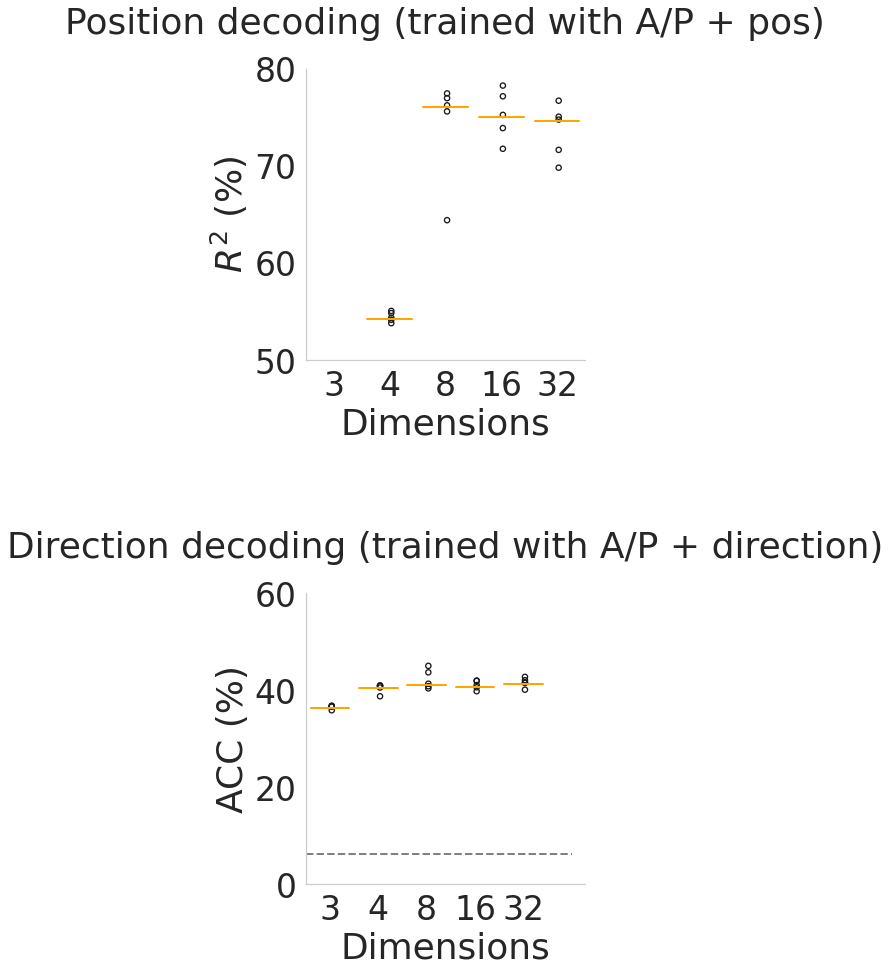

In [5]:
## All trials
ap_position_acc = data["ap_position_dim_decoding"]
ap_direction_acc = data["ap_direction_dim_decoding"]

sns.set(font_scale=3)
sns.set_style(
    "whitegrid",
    {"axes.grid": False},
)
fig = plt.figure(figsize=(5, 15))
axs = fig.subplots(2, 1)
plt.subplots_adjust(hspace=0.8)
data_list = [ap_position_acc, ap_direction_acc]
title_list = [
    "Position decoding (trained with A/P + pos)",
    "Direction decoding (trained with A/P + direction)",
]

chance = 1 / 16
units = ["$R^2$ (%)", "ACC (%)"]
ylims = [(50, 80), (0, 60)]
for i in range(2):
    m = 0
    ax = sns.stripplot(
        data=data_list[i][["3", "4", "8", "16", "32"]],
        facecolor="none",
        color="k",
        marker="$\circ$",
        s=10,
        jitter=0,
        ax=axs[i],
    )

    sns.boxplot(
        showmeans=False,
        medianprops={"color": "orange", "ls": "-", "lw": 2},
        whiskerprops={"visible": False},
        zorder=10,
        data=data_list[i][["3", "4", "8", "16", "32"]],
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=axs[i],
    )
    if i != 0:
        axs[i].plot(
            [-0.5, 5], [chance * 100, chance * 100], lw=2, ls="dashed", c="gray"
        )

    ax.set_xlabel("Dimensions")
    ax.set_ylim(ylims[i])
    ax.set_ylabel(units[i])
    ax.set_title(title_list[i], y=1.1)
    ax.set_xticks(ticks=np.arange(5))
    ax.set_xticklabels(labels=[3, 4, 8, 16, 32])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

plt.show()

Text(0.5, 1.0, '(cm)')

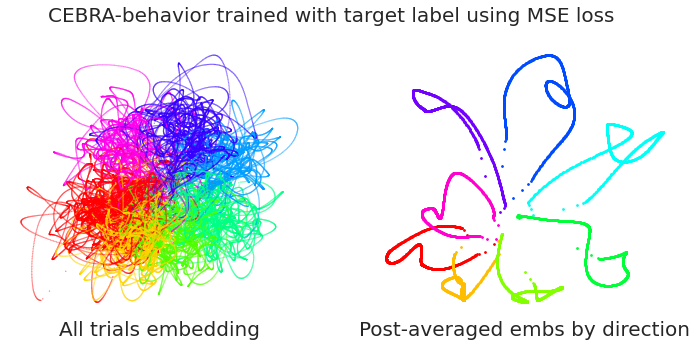

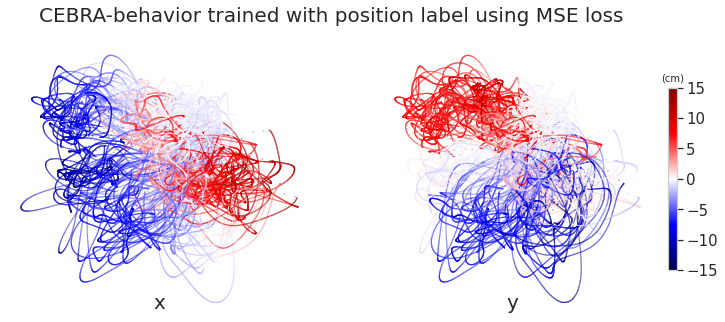

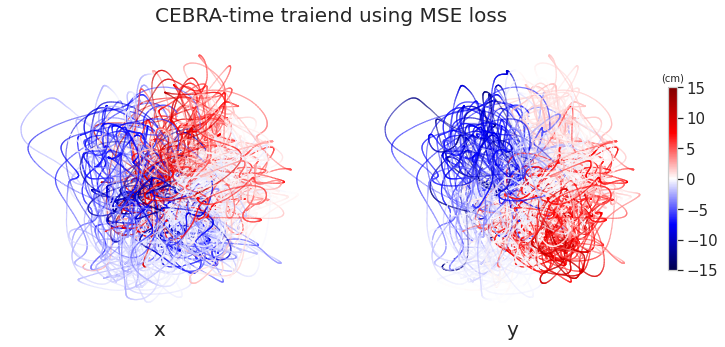

In [6]:
cebra_target = data['monkey_mse_viz']['cebra_target']['emission']
target_label = data['monkey_mse_viz']['cebra_target']['label']
cebra_pos = data['monkey_mse_viz']['cebra_pos']['emission']
pos_label = data['monkey_mse_viz']['cebra_pos']['label']
cebra_time = data['monkey_mse_viz']['cebra_time']['emission']


fig = plt.figure(figsize=(12,5))
plt.suptitle('CEBRA-behavior trained with target label using MSE loss', fontsize=20)
ax=plt.subplot(121)
ax.set_title('All trials embedding', fontsize=20, y=-0.1)
x=ax.scatter(cebra_target[:,0], cebra_target[:,1],  c = target_label, cmap = plt.cm.hsv, s=0.05)
ax.axis('off')
ax=plt.subplot(122)
ax.set_title('Post-averaged embs by direction', fontsize=20, y=-0.1)
for i in range(8):
    direction_trial = (target_label == i)
    trial_avg = cebra_target[direction_trial, :].reshape(-1, 600, 2).mean(axis=0)
    ax.scatter(trial_avg[:,0], trial_avg[:,1],  color=plt.cm.hsv(1 / 8 * i), s=3)
ax.axis('off')

fig = plt.figure(figsize=(12,5))
plt.suptitle('CEBRA-behavior trained with position label using MSE loss', fontsize=20)
ax=plt.subplot(121)
ax.set_title('x', fontsize=20, y=0)
x=ax.scatter(cebra_pos[:,0], cebra_pos[:,1],  c = pos_label[:,0], cmap = 'seismic', s=0.05,
                vmin=-15,vmax=15)
ax.axis('off')
ax=plt.subplot(122)
y=ax.scatter(cebra_pos[:,0], cebra_pos[:,1],  c = pos_label[:,1], cmap = 'seismic', s=0.05,
            vmin=-15, vmax=15)
ax.axis('off')
ax.set_title('y', fontsize=20,y=0)
yc = plt.colorbar(y, fraction=0.03, pad=0.05, ticks=np.linspace(-15, 15, 7))
yc.ax.tick_params(labelsize=15)
yc.ax.set_title("(cm)", fontsize=10)

fig = plt.figure(figsize=(12,5))
plt.suptitle('CEBRA-time traiend using MSE loss', fontsize=20)
ax=plt.subplot(121)
ax.set_title('x',  fontsize=20, y=-0.1)
x=ax.scatter(cebra_time[:,0], cebra_time[:,1],  c = pos_label[:,0], cmap = 'seismic', s=0.05,
                vmin=-15,vmax=15)
ax.axis('off')
ax=plt.subplot(122)
y=ax.scatter(cebra_time[:,0], cebra_time[:,1],  c = pos_label[:,1], cmap = 'seismic', s=0.05,
            vmin=-15, vmax=15)
ax.axis('off')
ax.set_title('y',  fontsize=20, y=-0.1)
yc = plt.colorbar(y, fraction=0.03, pad=0.05, ticks=np.linspace(-15, 15, 7))
yc.ax.tick_params(labelsize=15)
yc.ax.set_title("(cm)", fontsize=10)